##### 회귀 = 두변수의 상관관계를 분석하는 것, 숫자를 예측하는 것
##### K-최근접 이웃 회귀 : 샘플 X의 근처에 있는 값들의 평균을 구해 X의 값을 예측하는 것
        - 가장 먼저 가까운 k개의 이웃을 찾고 이웃 샘플의 타깃값을 평균하여 이 샘플의 예측값으로 사용

In [5]:
import pandas as pd
df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
cond = df['Species'] == 'Perch'

perch_data = df.loc[cond]
perch_data

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415
77,Perch,100.0,16.2,18.0,19.2,5.2224,3.3216
78,Perch,78.0,16.8,18.7,19.4,5.1992,3.1234
79,Perch,80.0,17.2,19.0,20.2,5.6358,3.0502
80,Perch,85.0,17.8,19.6,20.8,5.1376,3.0368
81,Perch,85.0,18.2,20.0,21.0,5.0820,2.7720


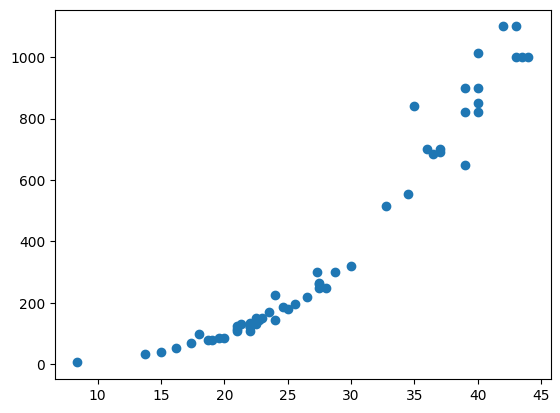

In [11]:
import matplotlib.pyplot as plt

plt.scatter(perch_data['Length2'], perch_data['Weight']) # 생선의 길이가 커질 수록 몸무게도 커짐

In [13]:
from sklearn.model_selection import train_test_split

In [48]:
train_input, test_input, train_target, test_target = \
train_test_split(perch_data[['Length2']], perch_data[['Weight']]) # 사이킷런에서 사용할 훈련 세트는 2차원 배열이어야 해서 [[]]를 해서 2차원 배열로 바꿔줌

In [49]:
train_input.head()

,Length2
96,24.0
99,25.0
79,19.0
106,28.0
105,27.5


### K-최근접 이웃 회귀 알고리즘

In [21]:
from sklearn.neighbors import KNeighborsRegressor

In [23]:
knr = KNeighborsRegressor()

In [28]:
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [29]:
knr.score(test_input, test_target)

0.9845794062540767

In [51]:

knr.predict([[100]])

C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([[436.975]])

### 회귀 알고리즘은 score로 정확성을 추측하기 어려워서 
### 타킷과 예측한 값 사이의 차이를 구해 보면 어느 정도 예측이 벗어났는지 가늠하기 좋음
### mean_absolute_error를 이용하여 타깃과 예측의 절댓값 오차를 평균하여 반환

In [53]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
print(test_input, test_prediction)
# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae) # 28정도의 오차가 난다.

     Length2
108     30.0
76      17.4
123     42.0
72       8.4
116     39.0
120     40.0
109     32.8
107     28.7
125     43.0
110     34.5
90      22.0
118     39.0
80      19.6
94      23.0 [[436.975 ]
 [385.6225]
 [436.975 ]
 [385.6225]
 [436.975 ]
 [436.975 ]
 [436.975 ]
 [412.975 ]
 [436.975 ]
 [436.975 ]
 [385.6225]
 [436.975 ]
 [385.6225]
 [385.6225]]
326.30982142857147


C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\yerin\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yerin\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038, in __init__
    self._execute_child(args, executable, preexe

In [58]:
knr.score(train_input, train_target) # 테스트세트 > 훈련 세트 : 과소 적합

0.09218924170373421

##### 훈련세트 점수 >>> 테스트 점수 : 모델이 훈련 세트에 과대적합
    - 과대적합시 모델을 덜 복잡하게 만들기
##### 테스트 점수 > 훈련세트 점수 or 훈련세트 점수, 테스트 점수 모두 낮을때 : 모델이 훈련 세트에 과소적합
    - 과소적합시 모델을 더 복잡하게 만들기
    
    

In [60]:
# k-최근접 이웃 모델을 더 복잡하게 만드는 방법은 이웃의 개수 k를 줄이는것
# 이웃의 개수를 줄이면 더 민감해지고, 개수를 늘리면 일반적인 패턴을 따르게 됨
knr.n_neighbors = 3 # 기본값이 k = 5여서 3개로 줄임
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))
print(knr.score(train_input, train_target)) # 훈련세트의 점수가 테스트 세트의 점수보다 높아짐

0.9355827035750476
0.9834320750256982


C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


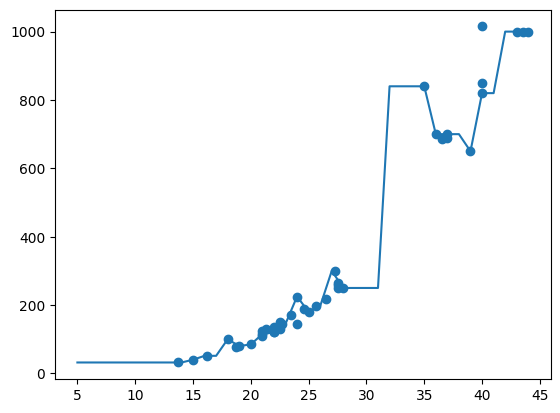

C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


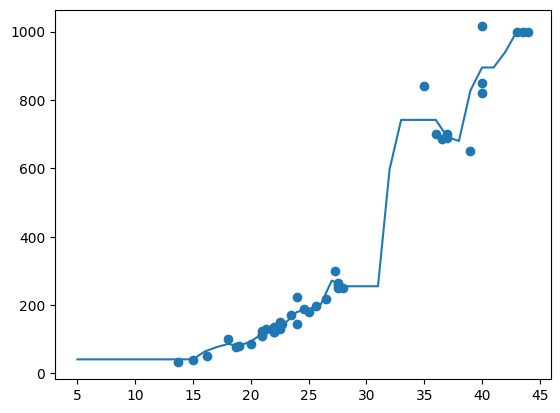

C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


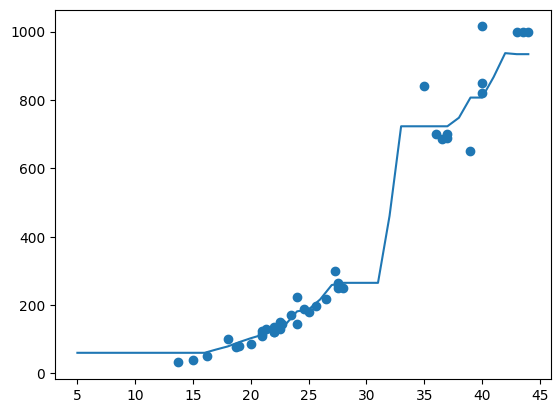

C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


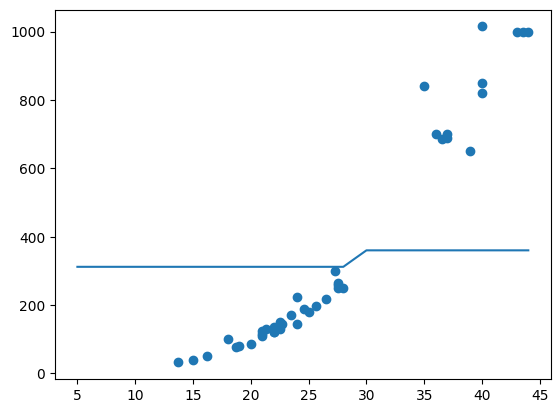

In [61]:

import numpy as np

knr = KNeighborsRegressor()

x = np.arange(5, 45).reshape(-1, 1)
# 5부터 44까지(45 미포함) 연속된 정수 배열을 생성 , 결과: [5, 6, 7, ..., 44] 
# 자동으로 행 개수를 맞추고 열을 1개로 설정, 1D 배열 [5, 6, ..., 44] → 2D 배열로 변환 
# (40, 1) 크기의 2D 배열이 됨.

for n in [1, 3, 5, 40]:
    knr.n_neighbors = n # 이웃의 개수에 따라 보기
    knr.fit(train_input, train_target) # 농어의 크기와 무게를 훈련

    prediction = knr.predict(x) # x의 값으로 예측

    plt.scatter(train_input, train_target) # 산점도
    plt.plot(x, prediction) # 예측결과를 선으로 그리기
    plt.show()

# 1 = 데이터에 가장 민감하게 반응, 과적합 가능성이 높아짐
# 3,5 = 적당한 k값
# 40 = 너무 부드러워지고 평균에 가까운 직선처럼 보일 수도 있음 (과소적합 가능성 ↑)